Taller 2
======

Cuadrados minimos
------

El objetivo del taller es ganar un entendimiento más profundo de los temas que entran en el segundo parcial.
Por tal motivo, se deben resolver los siguientes ejercicios y responder las preguntas justificando adecuadamente.


## Ejercicio 1
Dada la siguiente matriz
$$
A =
\begin{pmatrix}
	1 & \sqrt{3} & 0 \\
	\sqrt{3} & 4 & \sqrt{3}/2 \\
	0 & \sqrt{3}/2 & 7/4
\end{pmatrix}
$$

Hallar $A = U \Sigma V^t$ la descomposición en valores singulares de $A$ utilizando únicamente la función `eig` de Numpy para calcular los autovalores y autovectores necesarios.


In [2]:
import numpy as np
from numpy.linalg import eig

A = np.array([[1,          np.sqrt(3),   0           ],
              [np.sqrt(3), 4,            np.sqrt(3)/2],
              [0,          np.sqrt(3)/2, 7/4         ]])

S,c = eig(A)
B,U = eig(A@A.transpose())
B,V = eig(A.transpose()@A)

D = np.asmatrix(np.diag(S))

print(U@D@V.transpose())


[[1.00000000e+00 1.73205081e+00 8.88178420e-16]
 [1.73205081e+00 4.00000000e+00 8.66025404e-01]
 [8.88178420e-16 8.66025404e-01 1.75000000e+00]]


## Ejercicio 2

Dado el siguiente sistema lineal sobredeterminado:
$$
\begin{pmatrix}
1  & 0  & 0 \\
0  & 1  & 0 \\
0  & 0  & 1 \\
-1 & 1  & 0 \\
0  & -1 & 0 \\
-1 & 0  & 1
\end{pmatrix}
%
\begin{pmatrix}
x_a \\
x_b \\
x_c
\end{pmatrix}
=
\begin{pmatrix}
1 \\ 
2 \\ 
3 \\
1 \\
2 \\
1
\end{pmatrix}
$$
Resolver mediante cuadrados mínimos (utilizando ecuaciones normales). 

- Verificar que el residuo es ortogonal a las columnas de la matriz A. ¿A qué subespacio pertenece el residuo?

- ¿Cómo se relaciona el punto anterior con las ecuaciones normales? Justificar


In [13]:
A = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [-1,1, 0],
              [0,-1, 0],
              [-1,0, 1]])

b = np.array([1, 2, 3, 1, 2, 1])

#Idea Ax -b = 0 => At(Ax-b) = 0

At = A.transpose()
c = np.linalg.solve((At@A), (At@b))
print(c)

r = A@c - b
print(r)
print(r.shape)
r = np.reshape(r,(-1,1))
for i in range(A.shape[1]):
  if(np.inner(A[:,i],r) != 0):
    print(A[:,i])

[0.61538462 0.53846154 2.30769231]
[-0.38461538 -1.46153846 -0.69230769 -1.07692308 -2.53846154  0.69230769]
(6,)


ValueError: ignored

## Ejercicio 3

Completar los métodos de Jacobi y Gauss-Seidel  para resolver las ecuaciones normales de cuadrados mínimos mediante los mencionados métodos iterativos. 

Realizar lo siguiente:
- Explicar el problema: ¿Cómo son los datos? ¿Cómo los queremos aproximar?
- Probar distintos valores de cantidad de iteraciones e inicialización del vector solución. 
- Graficar los errores y la función aproximada por cuadrados mínimos.
- ¿Qué puede decir sobre los valores estimados de los coeficientes de mayor grado?


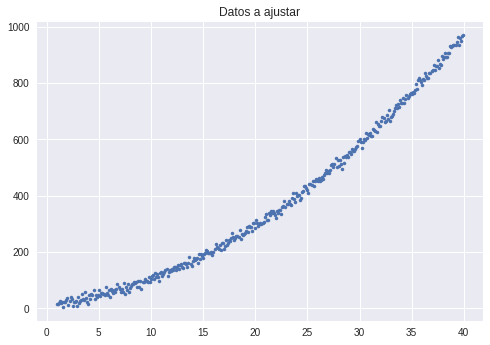

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Datos: polinomio de grado 2 (con ruido).
t = np.arange(1, 40, 0.1)
y = 1/2 * t ** 2 + 4 * t + 15
y = y + np.random.randn(*t.shape) * 10  # Agrego ruido

plt.plot(t, y, '.')
plt.title('Datos a ajustar')
plt.show()

In [0]:
# Ecuaciones normales de cuadrados minimos
# Vamos a fitear por un polinomio de grado 4

A = np.stack([np.ones(t.shape), t, t ** 2, t ** 3, t ** 4]).T
b = y

AtA = A.T @ A  # @ es una abreviacion de `np.matmul`
Atb = A.T @ b

correct_ans = np.linalg.solve(AtA, Atb)

np.set_printoptions(suppress=True)  # elimino notacion cientifica
print(correct_ans)

In [0]:
# Matrices para los metodos iterativos
D = np.diag(np.diag(AtA))
L = -np.tril(AtA, -1)
U = -np.triu(AtA, 1)

In [0]:
# Jacobi
T = _
c = _
reps = 20
xi = _
error = []
for i in range(reps):
    xi = _
    error.append(np.linalg.norm(xi - correct_ans))

print("Jacobi:")
print("Estimacion:", xi)
print("Respuesta correcta", correct_ans)

plt.plot(error)
plt.title("Error de Jacobi")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()

In [0]:
# Gauss-Seidel
T = _
c = _
reps = 100000;
xi = _
error = []
for i in range(reps):
    xi = _
    error.append(np.linalg.norm(xi - correct_ans))

print("Gauss-Seidel:")
print("Estimacion:", xi)
print("Respuesta correcta", correct_ans)

plt.plot(error)
plt.title("Error de Gauss-Seidel")
plt.xlabel("Iteracion")
plt.ylabel("Error")
plt.show()


In [0]:
plt.plot(y, '.')
pred = xi[0] * t + xi[1] * t**2 + xi[2] * t**3 + xi[3] * t**4
plt.plot(pred, 'r')
plt.title("Polinomio ajustado")
plt.xlabel("t")
plt.ylabel("y")
plt.show()

## Ejercicio 4

Para el punto anterior, indicar si los métodos convergen o no y por qué. ¿Qué propiedades pueden aplicar para explicar la convergencia (o falta de ella) para cada método?
Justificar adecuadamente.

**Respuesta**:

## Evaluación y entrega

- La evaluación será mediante un coloquio con los docentes durante la clase.
- El taller se realiza en grupos. Se recomienda que sean los mismos de los TPs.
- En caso de no asistir a clase, se debe entregar la resolución del taller por mail a metnum.lab@gmail.com hasta el día **Viernes 9 de Noviembre de 2018** justificando todas las respuestas.
